In [11]:
import numpy as np
import matplotlib.pyplot as plt

name_str='input300sample{}.npz'
sample_list = np.arange(50,150,10)
std_w_range = np.arange(0.001,0.4,0.06)
axis_std_w1 = np.arange(0, 1, 0.1)
axis_std_w2 = np.arange(0, 1, 0.1)
std_w1_axis, std_w2_axis = np.meshgrid(axis_std_w1,axis_std_w2)
accuracy_10_samples = np.zeros((10,10,10))


0.9921875
1.0
0.9921875
0.98828125
1.0
0.9921875
0.99609375
0.99609375
1.0
0.98828125


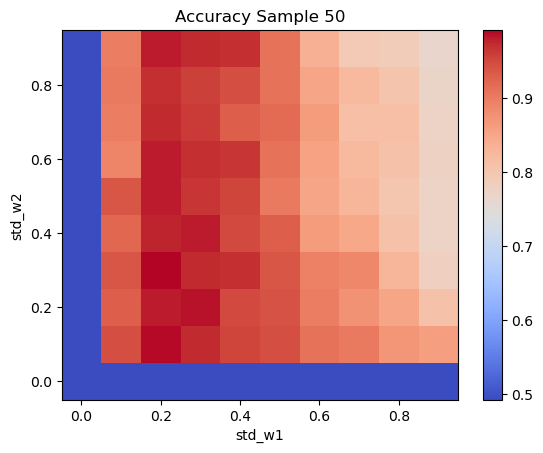

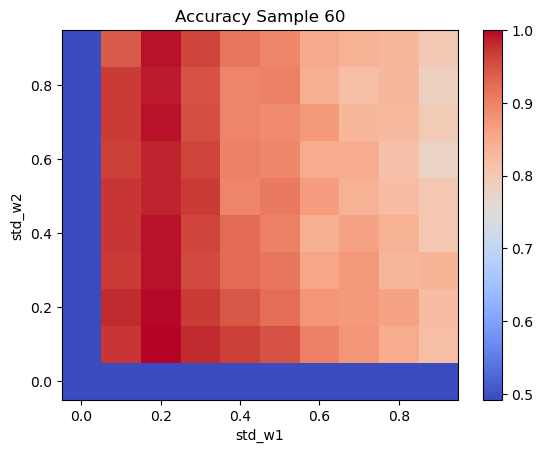

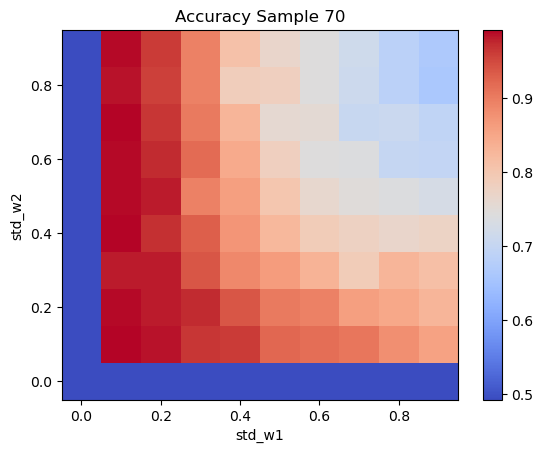

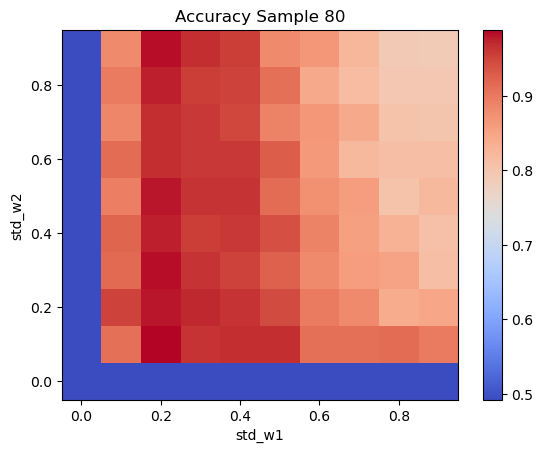

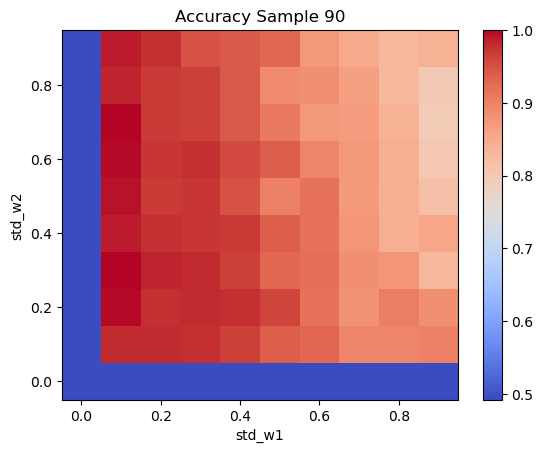

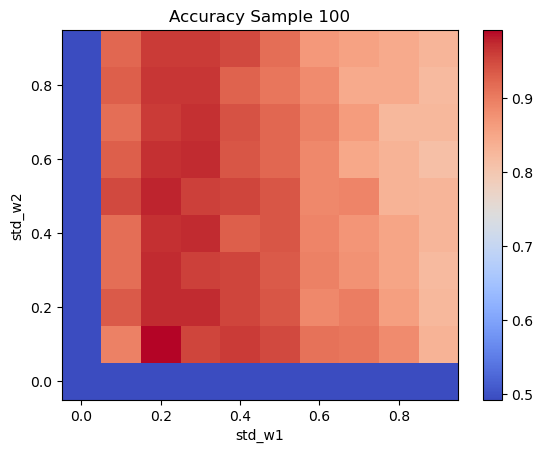

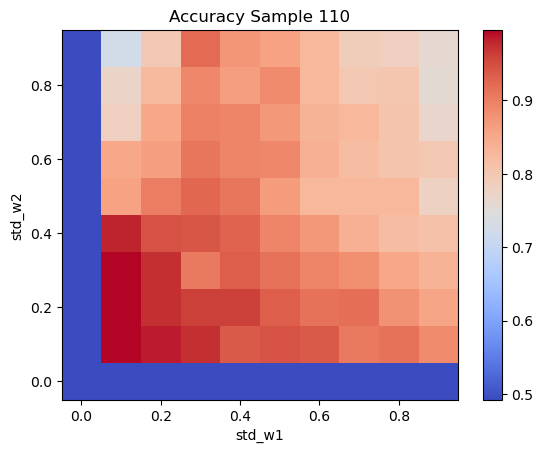

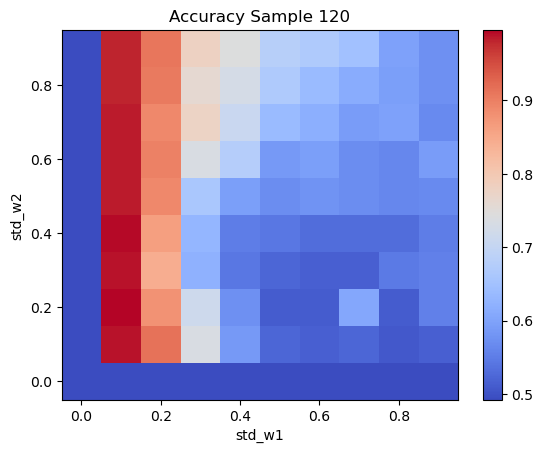

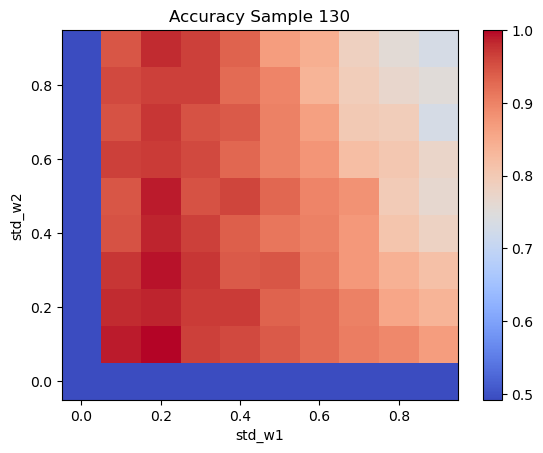

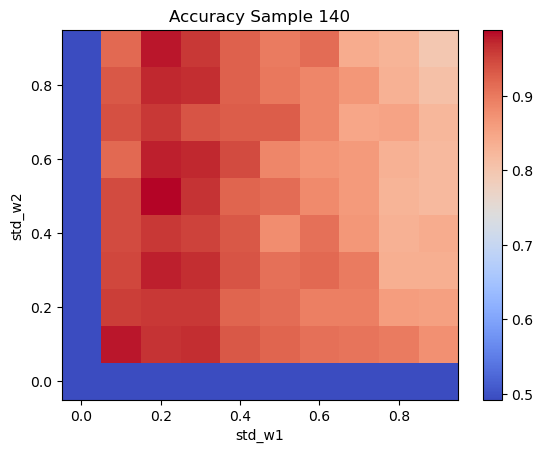

In [12]:
for (i,sample) in enumerate(sample_list):
    data = np.load(name_str.format(sample))
    fig = plt.figure()
    ax = plt.axes()
    b = ax.pcolormesh(axis_std_w1, axis_std_w2, data['accuracy_w1_w2'].T, cmap ='coolwarm')
    plt.colorbar(b)
    ax.set_xlabel('std_w1')
    ax.set_ylabel('std_w2')
    ax.set_title('Accuracy Sample {}'.format(sample))
    fig.savefig("accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in enumerate(axis_std_w1):
        for (k,std_w2) in enumerate(axis_std_w2):
            accuracy_10_samples[i][j][k]= data['accuracy_w1_w2'][j][k]
    max_accuracy = np.max(accuracy_10_samples[i])
    index_max_accuracy = np.argmax(accuracy_10_samples[i])
    test_best_w1_w2 = np.unravel_index(index_max_accuracy, accuracy_10_samples[i].shape)
    test_best_w1_best_w2 = (np.array(test_best_w1_w2)+np.array([0.5,0.5]))*0.015+0.005
    print(max_accuracy)



In [13]:
average_accuracy_grid_10_by_10_10_samples = np.mean(accuracy_10_samples, axis=0)
std_dev_accuracy_grid_10_by_10_10_samples = np.std(accuracy_10_samples, axis=0)

In [14]:
average_accuracy_grid_10_by_10_10_samples

array([[0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 ,
        0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 ],
       [0.4921875 , 0.96484375, 0.97109375, 0.9625    , 0.9578125 ,
        0.946875  , 0.94023437, 0.93203125, 0.93125   , 0.91875   ],
       [0.4921875 , 0.9796875 , 0.96835938, 0.96914062, 0.96132812,
        0.9640625 , 0.95546875, 0.95039063, 0.94921875, 0.95273438],
       [0.4921875 , 0.9453125 , 0.94570312, 0.92382812, 0.92617187,
        0.92226562, 0.93320313, 0.92734375, 0.92734375, 0.93359375],
       [0.4921875 , 0.91875   , 0.91523438, 0.90078125, 0.89570313,
        0.89648438, 0.90117187, 0.89609375, 0.8890625 , 0.9015625 ],
       [0.4921875 , 0.90039062, 0.89023438, 0.8796875 , 0.8703125 ,
        0.86484375, 0.8640625 , 0.86289063, 0.865625  , 0.86015625],
       [0.4921875 , 0.8765625 , 0.86210937, 0.85195312, 0.84101563,
        0.83476562, 0.82773438, 0.8328125 , 0.82382813, 0.82929688],
       [0.4921875 , 0.86445313, 0.8589843

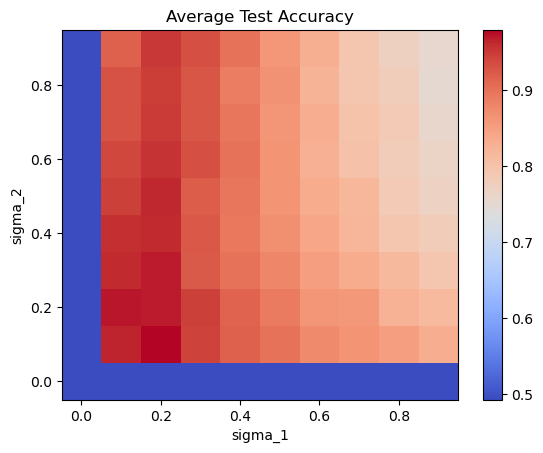

In [15]:
fig = plt.figure()
ax = plt.axes()
a = ax.pcolormesh(axis_std_w1, axis_std_w2, average_accuracy_grid_10_by_10_10_samples.T, cmap ='coolwarm')
plt.colorbar(a)
ax.set_xlabel('sigma_1')
ax.set_ylabel('sigma_2')
ax.set_title('Average Test Accuracy')


fig.savefig("average_accuracy_grid_300_0.1.png".format(sample))

In [16]:
average_accuracy_grid_10_by_10_10_samples >= 0.95*np.max(average_accuracy_grid_10_by_10_10_samples)

array([[False, False, False, False, False, False, False, False, False,
        False],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
        False],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False,  True,  True, False, False, False,  True, False, False,
         True],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

In [17]:
test1 = average_accuracy_grid_10_by_10_10_samples >= 0.95*np.max(average_accuracy_grid_10_by_10_10_samples)

test2 = np.sort(np.extract(test1, average_accuracy_grid_10_by_10_10_samples))

test3 = np.argwhere(average_accuracy_grid_10_by_10_10_samples>0.95546874)

print(test2)


[0.93125    0.93203125 0.93320313 0.93359375 0.94023437 0.9453125
 0.94570312 0.946875   0.94921875 0.95039063 0.95273438 0.95546875
 0.9578125  0.96132812 0.9625     0.9640625  0.96484375 0.96835938
 0.96914062 0.97109375 0.9796875 ]


In [18]:
array = []
for t1 in test3:
    tbw1_w2= (np.array(t1)+np.array([0.5,0.5]))*0.1
    array.append(tbw1_w2)

In [19]:
i=0
for element in array:
    data = {}
    data['frequency'] = 65
    data['N'] = 300
    data['w1'] = element[0]/0.3445
    data['w2'] = element[1]/0.3445
    np.savez("accuracy_300_seed_{}.npz".format(i),**data)
    i+=1

In [20]:
data = {}
data['frequency'] = 65
data['N'] = 300
data['accuracy'] = max_accuracy
data['w1'] = test_best_w1_best_w2[0]/0.3445
data['error_bar_w1'] = 0.0075/0.3445
data['w2'] = test_best_w1_best_w2[1]/0.3445
data['error_bar_w2'] = 0.0075/0.3445
np.savez("accuracy_300",**data)